# GeoPandas - the perfect marriage between shapefiles and dataframes

A **shapefile**:
  
* a collection of shapes (`.shp` file): Points, LineStrings, Polygons, ...

* attributes attached to these shapes (`.dbf` file): table-like

When having tabular data, we can put this in a pandas DataFrame

## GeoPandas

GeoPandas is a project to add support for geographic data to pandas objects:

* It currently implements GeoSeries and GeoDataFrame types and uses `shapely` objects as geometries
* Gives access to `shapely` methods to act on the geometry objects and perform geometric operations on the dataframe as a whole.

Sources:

* http://geopandas.org/
* https://github.com/geopandas/geopandas

Disclaimer: I am not a developer of geopandas, just discovered and used it this summer.

In [1]:
%matplotlib inline

In [2]:
import geopandas

In [3]:
import pandas as pd

pd.options.display.max_rows = 4

## Example

**Urban Atlas** is providing pan-European comparable land use and land cover data for Large Urban Zones (http://www.eea.europa.eu/data-and-maps/data/urban-atlas)

In [4]:
data = geopandas.read_file('layer_UrbanAtlas.shp')

In [5]:
data = data.drop(0)

In [6]:
data.head(3)

,CODE,ITEM,geometry
1,50000,Water bodies,"POLYGON ((142020.1473153155 227203.7438025186,..."
2,12100,"Industrial, commercial, public, military and p...","POLYGON ((153701.9483273522 215638.9148893422,..."
3,11210,Discontinuous Dense Urban Fabric (S.L. : 50% -...,"POLYGON ((157233.5600711927 211171.5496333176,..."


Calculating the area of each polygon:

In [7]:
data.geometry.area

1       20340243.939648
2           2292.936548
             ...       
4858        9903.479793
4859       13276.480434
dtype: float64

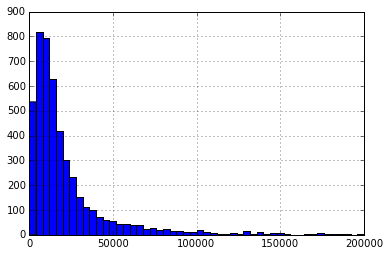

In [8]:
data.geometry.area.hist(bins=50, range=(0,0.2e6))

Plotting the shapes with coloring based on another column:

In [9]:
bounds = data.bounds
bounds

,minx,miny,maxx,maxy
1,139471.055628,198347.255046,152337.873402,229458.363999
2,153623.878308,215637.980741,153702.037465,215668.141620
...,...,...,...,...
4858,151553.731483,205859.372355,151655.825393,206024.339100
4859,149364.324873,205825.542594,149529.062546,206024.618110


In [10]:
data = data[((bounds['minx'] < 160000) & (bounds['maxx'] > 150000)
             & (bounds['miny'] < 215000) & (bounds['maxy'] > 208000))]

In [11]:
data = data[data['ITEM'] != 'Water bodies']

(208000, 215000)

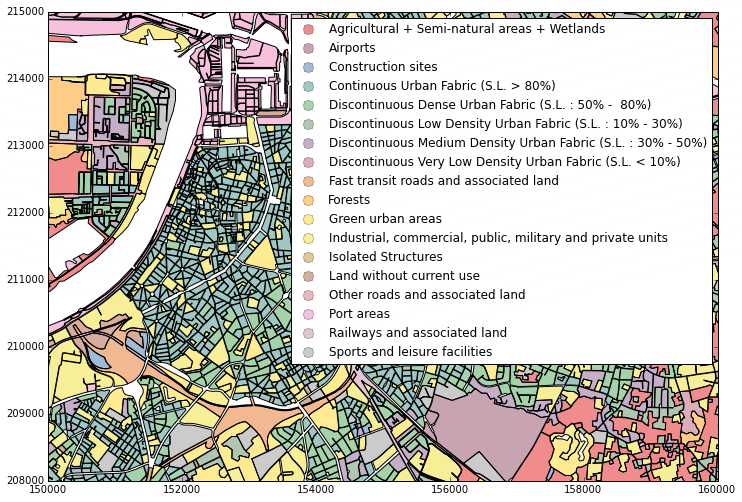

In [13]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
data.plot(column='ITEM', legend=True, ax=ax)
ax.set_xlim(150000, 160000)
ax.set_ylim(208000, 215000)

Filtering the dataframe:

In [14]:
green_areas = data[data['ITEM']=='Green urban areas']

In [15]:
streets = geopandas.read_file("layer_navstreets.shp")

(208000, 215000)

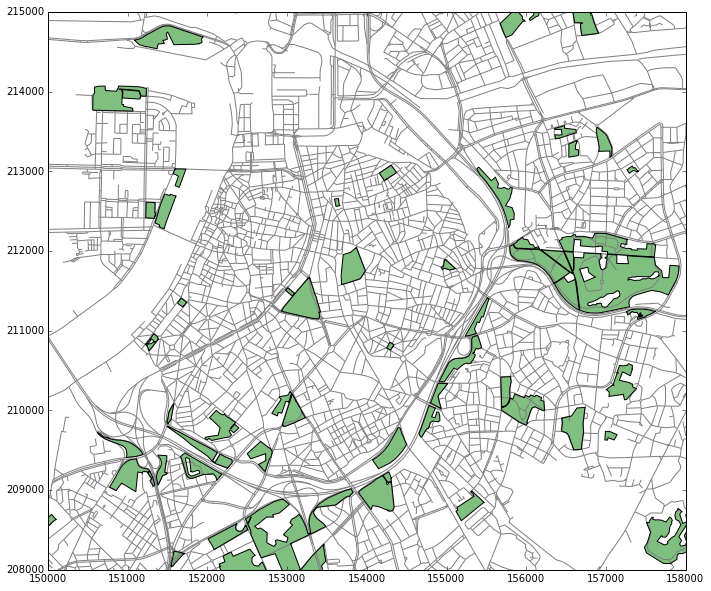

In [16]:
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'aspect':'equal'})
streets.plot(ax=ax, color="grey", linewidth=0.5)
green_areas.plot(ax=ax, color='green')
ax.set_xlim(150000, 158000)
ax.set_ylim(208000, 215000)

(208000, 215000)

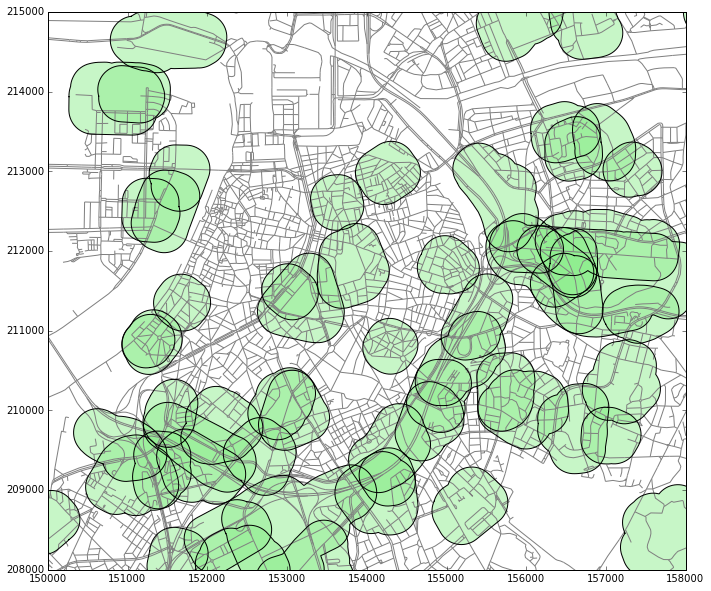

In [17]:
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'aspect':'equal'})
streets.plot(ax=ax, color="grey", linewidth=0.5)
green_areas.geometry.buffer(300).plot(ax=ax, color='lightgreen')
ax.set_xlim(150000, 158000)
ax.set_ylim(208000, 215000)

Looking at some addresses:

In [18]:
addresses = geopandas.read_file('layer_CRAB.shp')

In [19]:
x = addresses.geometry.apply(lambda p: p.x)
y = addresses.geometry.apply(lambda p: p.y)

In [20]:
addresses = addresses[(x < 156000) & (x > 152000) & (y < 213000) & (y > 210000)]

(210000, 213000)

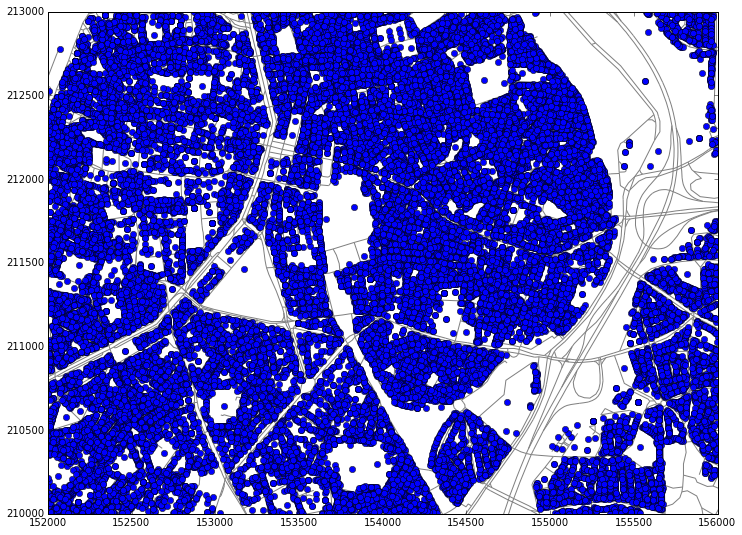

In [21]:
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'aspect':'equal'})
streets.plot(ax=ax, color="grey", linewidth=0.5)
addresses.plot(ax=ax, color='blue')
ax.set_xlim(152000, 156000)
ax.set_ylim(210000, 213000)

Question: what is the distance to the nearest green area for all adresses?

In [22]:
urban_green = data[(data['ITEM']=='Green urban areas') & (data.geometry.area > 10000)]

In [23]:
def urban_green_dist(point, urban_green):
    return urban_green.geometry.distance(point).min()

In [24]:
min_distance = addresses.geometry.apply(lambda x: urban_green_dist(x, urban_green))

In [26]:
addresses['min_distance'] = min_distance

(210000, 213000)

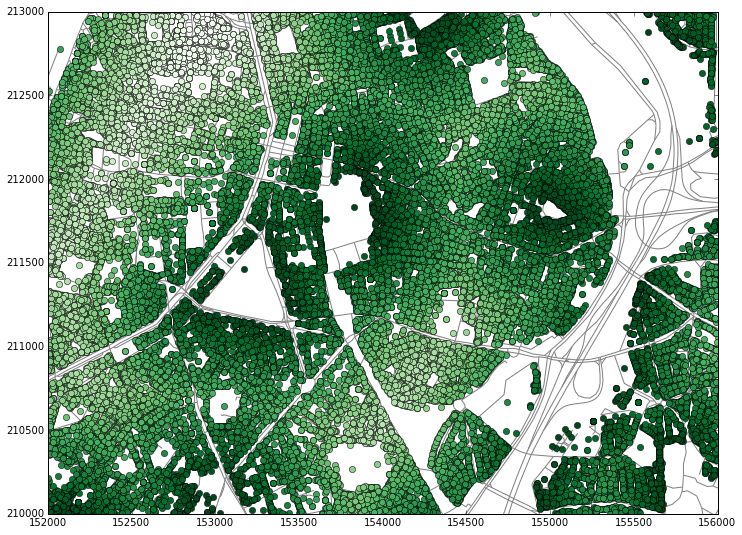

In [33]:
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'aspect':'equal'})
streets.plot(ax=ax, color="grey", linewidth=0.5)
addresses.plot(ax=ax, column='min_distance', colormap='Greens_r')
ax.set_xlim(152000, 156000)
ax.set_ylim(210000, 213000)

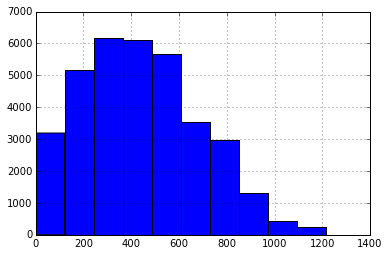

In [34]:
addresses['min_distance'].hist()